# Read single-trial EEG epochs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from spudtr import get_demo_df, P3_1500_FEATHER
from spudtr import epf

In [2]:
epochs_df = get_demo_df(P3_1500_FEATHER)

# example: four midline EEG channels
eeg_channels = ['MiPf', 'MiCe', 'MiPa', 'MiOc']

# check the epochs format
epf.check_epochs(epochs_df, eeg_channels, epoch_id="epoch_id", time="time_ms")

# preview the entire dataframe
epochs_df

/home/turbach/miniconda3/envs/mckonda_spudtr_dev/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-17.734375,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,-15.304688,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,-11.171875,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,-8.742188,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,-8.015625,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,-3.400391,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,-3.644531,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,-3.400391,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,-3.886719,-4.429688,-4.406250,-3.900391,-4.371094


# Common A1 to average mastoid reference

a.k.a. "bimastoid", "linked mastoid"

**Warning, only valid for EEG recorded with a common A1 reference**

In [3]:
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'A2', 
    "linked_pair",
    epoch_id="epoch_id", time="time_ms",
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-20.564453,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,-16.289062,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,-15.355469,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,-13.417969,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,-12.078125,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,-1.185547,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,-1.429688,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,-1.185547,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,-1.671875,-4.429688,-4.406250,-3.900391,-4.371094


# New common reference

> Note: Only valid for common reference EEG data.

For example change from common A1 reference to a vertex or nose tip common reference.

Note: new the new reference = 0 as expected.

In [4]:
# vertex location is MiCe
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    'MiCe',
    "new_common", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-20.515625,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,-11.257812,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,-7.882812,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,-6.212891,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,-12.062500,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,0.392578,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,0.148438,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,0.392578,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,-0.093750,-4.429688,-4.406250,-3.900391,-4.371094


# Common average reference

Note: for demonstration only, a real application would use all scalp locations

In [5]:
reference_channels = ["MiPf", "MiCe", "MiPa", "MiOc", "A2"]
epf.re_reference(
    epochs_df, 
    eeg_channels, 
    reference_channels ,
    "common_average", 
    epoch_id='epoch_id', 
    time='time_ms'
)

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-3.210156,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,1.857813,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,2.100781,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,3.550977,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,0.596875,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,0.482812,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,0.287500,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,0.482812,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,0.093750,-4.429688,-4.406250,-3.900391,-4.371094


# Center EEG data in an interval (baseline)

> The `start` and `stop` interval units are the same as the time channel

In [6]:
start = -500
stop = -4
centered_eeg_df = epf.center_eeg(
    epochs_df, 
    eeg_channels, 
    start, 
    stop, 
    epoch_id='epoch_id', 
    time='time_ms'
)
centered_eeg_df

,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-23.419617,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,-20.989929,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,-16.857117,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,-14.427429,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,-13.700867,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,-3.422127,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,-3.666268,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,-3.422127,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,-3.908455,-4.429688,-4.406250,-3.900391,-4.371094


# Exclude previously tagged artifacts

This special-purpose filter drops entire epochs where the time-locking event at time 0 is tagged as bad for some reason on the specified `bads_column`. 

This implements a simple convention for pruning epochs based on tags generated by artifact screening functions.

Any column can be used or constructed for this purpose.

Example: drop all epochs where `eeg_artifact` is other than 0 at `time_ms` == 0 

In [7]:
good_epochs = epf.drop_bad_epochs(
    epochs_df, 
    bads_column="eeg_artifact",
    epoch_id='epoch_id', 
    time='time_ms',
)

print("Total number of epoch ids: ", len(epochs_df["epoch_id"].unique()))
print("Number of good epoch ids: ", len(good_epochs["epoch_id"].unique()))
good_epochs

Total number of epoch ids:  600
Number of good epoch ids:  542


,epoch_id,time_ms,sub_id,eeg_artifact,dblock_path,log_evcodes,log_ccodes,dblock_srate,ccode,instrument,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
0,0,-748,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-25.093750,-0.753906,1.480469,-13.414062,-18.937500,-17.734375,5.660156,98.875000,-39.500000,38.375000
1,0,-744,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-24.593750,0.502441,-2.466797,-17.640625,-17.468750,-15.304688,1.968750,104.750000,-38.031250,41.281250
2,0,-740,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-16.484375,-1.507812,3.947266,-15.648438,-10.085938,-11.171875,8.367188,102.062500,-33.656250,43.718750
3,0,-736,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-11.804688,-15.070312,9.867188,-14.906250,-7.378906,-8.742188,9.351562,100.562500,-42.906250,37.406250
4,0,-732,sub000,0,sub000/dblock_0,0,0,250.0,1,eeg,...,-6.394531,-4.019531,9.125000,-10.679688,-6.886719,-8.015625,8.125000,98.375000,-43.875000,37.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224995,600,732,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.671875,-3.517578,-4.441406,-4.718750,-4.671875,-3.400391,-4.429688,-4.406250,-3.900391,-4.371094
224996,600,736,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.179688,-4.019531,-4.195312,-4.222656,-4.425781,-3.644531,-4.429688,-4.160156,-3.412109,-4.371094
224997,600,740,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-3.767578,-4.441406,-3.974609,-4.425781,-3.400391,-4.429688,-4.160156,-3.900391,-4.859375
224998,600,744,sub000,0,sub000/dblock_4,0,0,250.0,0,cal,...,-4.425781,-4.269531,-4.195312,-4.222656,-4.425781,-3.886719,-4.429688,-4.406250,-3.900391,-4.371094


# Filter EEG epochs: 

**Configure the filter**

If left unspecified, the optional parameters `width_hz`, `ripple_db` and `window` default to reasonable values.

Pass them in explicitly if you want different values.

lowpass filter
sampling rate (samples / s): 250.00000
1/2 amplitude cutoff (Hz): 20.00000
transition width (Hz): 5.00000
ripple (dB): 53.00000
window: kaiser
length (coefficients): 159
delay (samples): 79
edge distortion: first and last 0.3160 seconds of the data(= 79 samples at 250.0 samples / s)


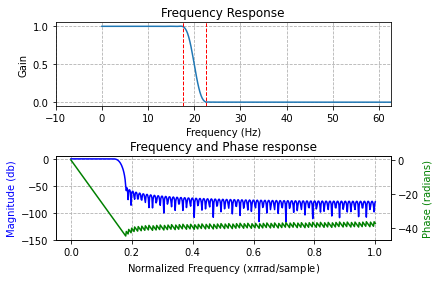

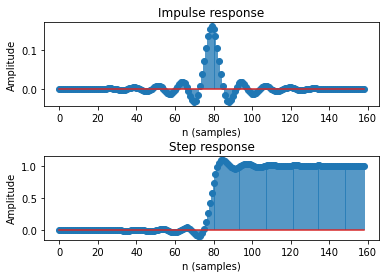

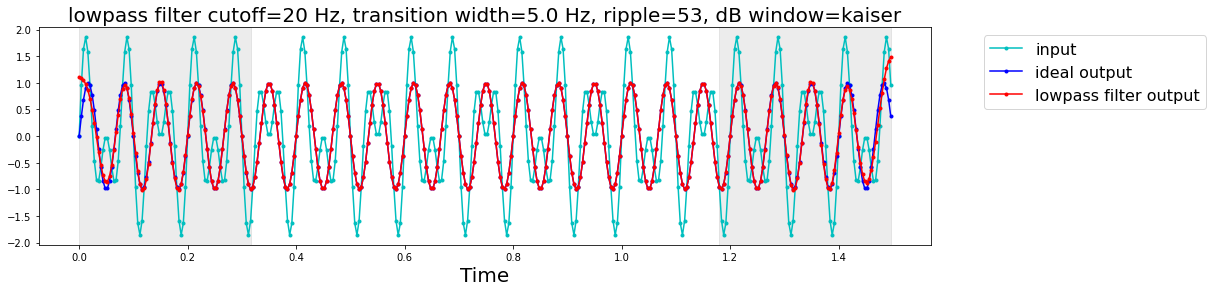

In [8]:
from spudtr import filters

lp_specs = {
    "ftype": "lowpass",  # lowpass, bandpass, highpass
    "cutoff_hz": 20,     # 1/2 amplitude frequency Hz
    "sfreq": 250.0,      # sampling rate in samples/second
}

bode, imp, s_edge, n_edge = filters.show_filter(**lp_specs);  # expand the dictionary with python ** trick

**Apply the filter ... note the ** python trick to expand the dictionary keyword arguments**

In [9]:
# update the specs with default values
lp_specs["window"] = "kaiser"
lp_specs["width_hz"] = 5.0
lp_specs["ripple_db"] = 53.0

epochs_df_lp = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=False,
    **lp_specs,
    )

times = epochs_df["time_ms"].unique()
epoch_ids = epochs_df["epoch_id"].unique()

3. Compare the output

# Filter EEG epochs, trim distorted edges

In [10]:
epochs_df_lp_trimmed = epf.fir_filter_epochs(
    epochs_df,
    data_columns=eeg_channels,
    epoch_id="epoch_id",
    time="time_ms",
    trim_edges=True,
    **lp_specs,
    )

trimmed_times = epochs_df_lp_trimmed["time_ms"].unique()

Compare the output

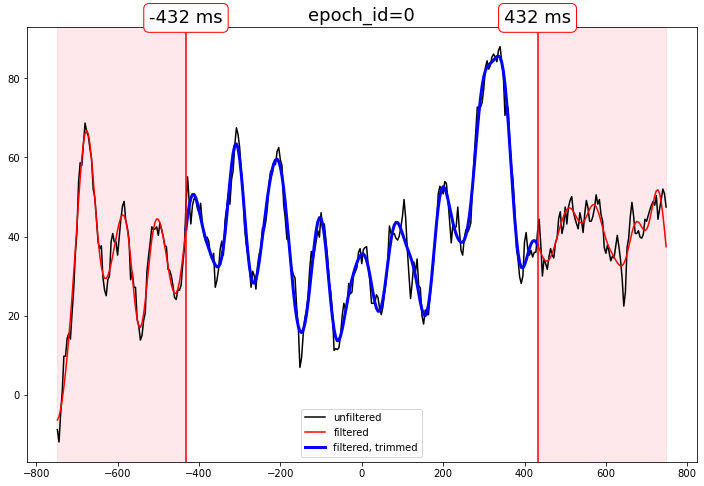

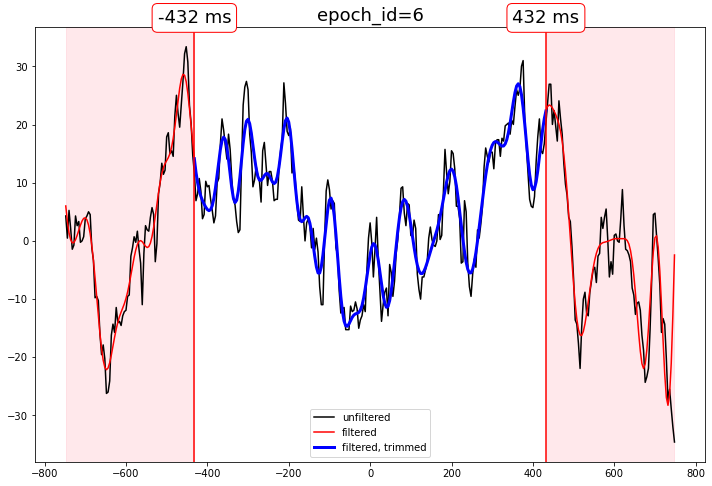

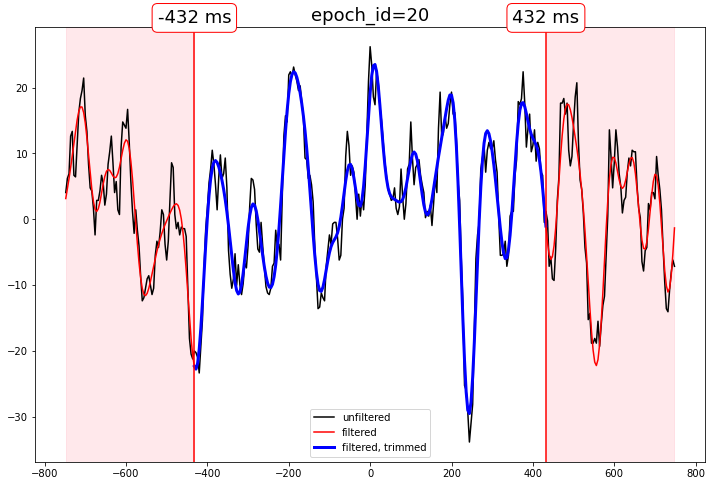

In [11]:
# select some epochs to show
epidxs = [0, 6, 20]
channel = "MiPa"

for epidx in epidxs:

    qstr = f"epoch_id == @epoch_ids[{epidx}]"
    f, ax = plt.subplots(figsize=(12,8))
    ax.set_title(f"epoch_id={epidx}",  fontsize=18)
    
    # unfiltered
    ax.plot(
        times,
        epochs_df.query(qstr)[channel],
        color="black", 
        label="unfiltered"
    )
    
    # filtered, phase compensated with distortion
    ax.plot(
        times,
        epochs_df_lp.query(qstr)[channel],
        color="red", 
        label="filtered"
    )
    
    # filtered, phase compensated, distortion trimmed
    ax.plot(
        trimmed_times,
        epochs_df_lp_trimmed.query(qstr)[channel], 
        color="blue", 
        lw=3, 
        label="filtered, trimmed"
    )

    # decorate the beginning and end of the delay shift distortion regions
    for xtime in [trimmed_times[0], trimmed_times[-1]]:
        
        # beginning and end of the trimmed data
        ax.axvline(xtime, color="red")
        ax.annotate(
            s=f"{str(xtime)} ms", 
            xy=(xtime, ax.get_ylim()[1]), 
            fontsize=18, 
            ha="center", 
            va="bottom",
            bbox=dict(boxstyle="round", ec="red",fc="white")
        )
            
        # highlight the trimmed region
        for bound in [0, -1]:
            ax.axvspan(
                times[bound], 
                trimmed_times[bound], 
                color="pink", 
                alpha=.2
            )
    
    ax.legend()